In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import re
import numpy as np

In [2]:
df = pd.read_excel("Data_Science_Internship.xlsx")

In [3]:
df.head(5)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  float64       
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.isna().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [8]:
df.drop(df[(df["status"] != "LOST") & (df["status"] != "WON")].index, inplace = True)

In [9]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 0, inplace=True)

In [10]:
df.replace(0, np.nan, inplace=True)

In [11]:
df.dropna(thresh= 12, inplace= True)

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ["lease"] and feature not in ["budget"] and feature not in ["room_type"] and feature not in ["lost_reason"]]
for i in df.columns:
        if i in categorical_features:
            df[i] = le.fit_transform(df[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38292 entries, 2 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        38292 non-null  int32         
 1   status          38292 non-null  int32         
 2   lost_reason     36014 non-null  object        
 3   budget          38284 non-null  object        
 4   lease           34536 non-null  object        
 5   movein          29959 non-null  datetime64[ns]
 6   source          38292 non-null  int32         
 7   source_city     38292 non-null  int32         
 8   source_country  38292 non-null  int32         
 9   utm_source      38292 non-null  int32         
 10  utm_medium      38292 non-null  int32         
 11  des_city        38292 non-null  int32         
 12  des_country     38292 non-null  int32         
 13  room_type       22825 non-null  object        
 14  lead_id         38292 non-null  int32         
dtypes:

In [14]:
df["budget"].str.contains("not").sum()

3

In [23]:
df["lease"].unique()

array(['42 weeks', nan, '22 weeks', '52 weeks', 'Other', '51 weeks',
       '9 weeks', 'other', '44 weeks', '20 - 24 weeks', '45 weeks',
       '6 weeks', '44 week', '3 month', '44-51 weeks', '3 months',
       '6 months', '2 years', '51weeks', '2 weeks', 'lease', '52weeks',
       '50 - 52 weeks', '44 - 51 weeks', '4-8 weeks', '4 weeks',
       '10-15 weeks', '40-44', '52 weeks]', '40 - 44 weeks', '51 week',
       '36 - 44', '44 51 weeks', '40 weeks', '12-24', '1 month',
       '10 months', '44 WEEKS', '24-44 weeks', '06 months', '16 weeks',
       '4 WEEKS', '44weeks', '500-550pm', '12m', '5 months', 'not sure',
       '12 weeks', '41 weeks', '51 weeks weeks', '44-51', '10 weeks',
       '5-6 months', 'ASAP', '2-3 months', '41weeks', '35 weeks',
       '16 week', '51-54weeks', '3 years', '4 months', 'long tearm',
       'Stay 50 - 52 weeks', '30 weeks', '3-4 weeks', '44-51 weeeks',
       '9-12 months', '44WEEKS', '2 -3weeks', '3-4 months', '8 weeks',
       '15 weeks', '20weeks', '

In [16]:
df["lease"] = df["lease"].str.replace("\\", " ")

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\2712900377.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["lease"] = df["lease"].str.replace("\\", " ")


In [17]:
df["lease"] = df["lease"].str.replace("/", " ")

In [21]:
df["lease"] = df["lease"].str.replace("mnth", "months")

In [18]:
df.loc[df["lease"].str.contains("Full year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1 year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full yyear",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-COURSE",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("COMPLETE ",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("SEM",na= False, flags= re.IGNORECASE), "lease"] = "22 weeks"
df.loc[df["lease"].str.contains("SHORT",na= False, flags= re.IGNORECASE), "lease"] = "9 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("whole year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("full course",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("academic",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"

In [ ]:
a["lease"] = df[df["lease"].str.endswith(("month", "m","mnth"))]

In [24]:
df.head(5)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
2,80,0,Not responding,£121 - £180 Per Week,42 weeks,2022-08-31,126,2534,163,20,3,18,8,Ensuite,16007
3,103,0,Low budget,0-0,NaN,NaT,199,2723,163,20,3,26,8,NaN,3215
5,13,0,Wants private accommodation,120.0,22 weeks,NaT,127,2028,99,20,3,203,8,NaN,18985
6,13,0,Short stay,0-0,NaN,NaT,164,999,163,9,3,198,8,NaN,13413
7,25,0,Wants private accommodation,£181 - £240 Per Week,NaN,2022-09-08,126,2195,163,20,3,113,8,Entire Place,16007


In [22]:
df["lease"].nunique()

137

In [25]:
df["budget"].nunique()

1041

In [26]:
df.loc[df["budget"].str.contains("no",na= False, flags= re.IGNORECASE), "budget"] = "0"

In [27]:
df["budget"] = df["budget"].str.replace("pw", " Per Week")
df["budget"] = df["budget"].str.replace("pcm", " per month")
df["budget"] = df["budget"].str.replace("pm", " per month")
df["budget"] = df["budget"].str.replace("  Per Week -151 ", "-151")
df["budget"] = df["budget"].str.replace("0 month", "0 per month")
df["budget"] = df["budget"].str.replace("0 week", "0 Per Week")

In [28]:
df["budget"] = df["budget"].str.replace(" Per Week", "")
df["budget"] = df["budget"].str.replace(" Per week", "")
df["budget"] = df["budget"].str.replace(" per week ", "")
df["budget"] = df["budget"].str.replace(" per weeks", "")

In [29]:
df["budget"] = df["budget"].str.replace("Per week", "")
df["budget"] = df["budget"].str.replace(" per week", "")

In [30]:
df["budget"] = df["budget"].str.replace(" week", "")
df["budget"] = df["budget"].str.replace(" WEEK", "")
df["budget"] = df["budget"].str.replace(" W", "")
df["budget"] = df["budget"].str.replace("week", "")

In [31]:
df["budget"] = df["budget"].str.replace("£", "")
df["budget"] = df["budget"].str.replace("0-0", "0")

In [32]:
df["budget"] = df["budget"].str.replace("/", " ")

In [33]:
df["budget"] = df["budget"].replace(np.nan, "0")

In [34]:
df

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
2,80,0,Not responding,121 - 180,42 weeks,2022-08-31,126,2534,163,20,3,18,8,Ensuite,16007
3,103,0,Low budget,0,NaN,NaT,199,2723,163,20,3,26,8,NaN,3215
5,13,0,Wants private accommodation,0,22 weeks,NaT,127,2028,99,20,3,203,8,NaN,18985
6,13,0,Short stay,0,NaN,NaT,164,999,163,9,3,198,8,NaN,13413
7,25,0,Wants private accommodation,181 - 240,NaN,2022-09-08,126,2195,163,20,3,113,8,Entire Place,16007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,13,0,Low availability,60 - 120,52 weeks,2022-09-01,280,2049,99,20,3,22,8,Studio,2958
46604,22,0,Semester stay,60 - 120,9 weeks,2022-09-29,280,2605,99,20,3,130,8,Studio,3497
46605,4,0,Low availability,241 - 300,42 weeks,2022-09-20,126,2049,99,20,3,198,8,Studio,23200
46606,55,0,Low availability,0,NaN,2022-08-30,232,3818,131,15,43,198,8,NaN,3497


In [35]:
a = df[df["budget"].str.endswith(("month"))]
a[["start", "end"]] = a["budget"].str.split("per month", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\1228771801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\1228771801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)


In [36]:
a["start"] = a["start"].str.replace("500 600", "500-600")

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\3248654593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("500 600", "500-600")


In [37]:
a[["start", "end"]] = a["start"].str.split("month", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\702794889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["start"].str.split("month", expand=True)


In [38]:
a["start"] = a["start"].str.replace(r"[a-zA-Z]", "")

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\3661770482.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  a["start"] = a["start"].str.replace(r"[a-zA-Z]", "")
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\3661770482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace(r"[a-zA-Z]", "")


In [39]:
a["start"] = a["start"].str.replace(">", "0-")

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\1571188641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace(">", "0-")


In [40]:
a["start"] = a["start"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\1161830120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].replace(np.nan, 0)


In [41]:
a.isna().sum()

Agent_id            0
status              0
lost_reason         6
budget              0
lease              30
movein             20
source              0
source_city         0
source_country      0
utm_source          0
utm_medium          0
des_city            0
des_country         0
room_type         102
lead_id             0
start               0
end                89
dtype: int64

In [42]:
a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [43]:
a["middle"] = a["middle"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\2583533446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = a["middle"].replace(np.nan, 0)


In [44]:
a["start"] = (a["start"]).astype(int)
a["middle"] = (a["middle"]).astype(int)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\2257521966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]).astype(int)
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\2257521966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]).astype(int)


In [45]:
a 

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,start,end,middle,last
323,60,0,Low budget,500 per month,NaN,NaT,127,103,99,20,3,179,8,NaN,16410,500,None,0,None
543,20,0,Low availability,850 month,51 weeks,2022-09-09,127,638,99,20,3,11,0,NaN,4525,850,,0,None
982,28,0,Not a student,2200 per month,3 months,2022-09-01,164,3868,163,9,3,198,8,NaN,23829,2200,None,0,None
1064,19,0,Not a student,1000 month,6 months,NaT,164,3265,163,20,30,204,8,NaN,4657,1000,,0,None
1195,11,0,Wants private accommodation,1300 -1500 month,52 weeks,2022-09-01,43,4173,180,15,2,198,8,NaN,14152,1300,,1500,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44835,46,0,Low budget,300 per month,44 weeks,2022-09-01,199,3868,163,24,56,132,8,NaN,6419,300,None,0,None
45508,19,0,Not a student,450 month,51 weeks,2022-09-07,126,3172,163,20,3,168,8,Ensuite,26548,450,,0,None
45573,60,0,Low budget,450 per month,52 weeks,2022-09-09,280,3785,99,20,3,204,8,Entire Place,21967,450,None,0,None
45611,111,0,Booked with competitor,350 per month,51 weeks,2022-09-09,280,2619,99,20,3,210,8,Ensuite,13000,350,None,0,None


In [46]:
a["start"] = (a["start"]/4)
a["middle"] = (a["middle"]/4)

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\11739153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]/4)
C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\11739153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]/4)


In [47]:
a = a.drop("end", axis=1)
a = a.drop("last", axis=1)

In [113]:
type(a["middle"].iloc[0])

numpy.float64

In [144]:
a["middle"] = a["middle"].astype(int)

In [138]:
for i in a["middle"]:
    print(i)

0
0
0
0
375
0
0
150
0
0
0
152
125
175
0
0
0
87
0
0
0
0
0
0
0
0
0
0
0
0
0
187
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
625
187
0
0
0
0
0
0
0
0
0
0
75
0
150
250
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
125
0
250
0
0
0
0
0
100
125
150
0
187
0
0
150
0
0
0
0
0
112
0
0
137
0
0
0
150
137
0
0
0
0
0
0
100
0
100
0
0
0
0
0


In [149]:
for i in a["middle"]:
    if i > 0:
        a["budget_"] = a["start"] + "-" +a["middle"]

TypeError: can only concatenate str (not "int") to str

In [130]:
for i in a["middle"]:
    if i == 0:
        a["start"] = a["start"].astype(str)
        a["middle"] = a["middle"].astype(str)
        a["budget_"] = a["start"] + "-" + a["middle"]
 
    else: 
        a["budget_"] = a["start"]
        

In [48]:
a.tail(60)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,start,middle
22911,111,0,Wants private accommodation,500 per month,51 weeks,2022-09-17,199,2943,167,17,35,210,8,NaN,6681,125.0,0.0
24068,111,0,Short stay,400 per month,lease,2022-09-13,18,4173,180,15,4,26,8,NaN,1773,100.0,0.0
24239,19,0,Just Enquiring,500 month,19 weeks,2022-09-12,18,4173,180,15,4,154,8,NaN,22796,125.0,0.0
24443,60,0,Low budget,400 per month,9 weeks,2022-08-31,126,3029,99,20,3,198,8,Ensuite,27019,100.0,0.0
24558,97,0,Low budget,500 month,42 weeks,2022-09-14,126,696,163,20,3,132,8,Entire Place,24582,125.0,0.0
24886,98,0,Low budget,450 per month,NaN,NaT,199,1003,163,20,3,48,8,NaN,4528,112.5,0.0
25033,111,0,Low budget,600 per month,51 weeks,2022-09-15,126,638,99,20,3,198,8,Ensuite,21010,150.0,0.0
25051,60,0,Low budget,1000 per month,51 weeks,2022-09-20,199,2936,163,20,3,48,8,NaN,24094,250.0,0.0
25106,20,0,Low availability,800 per month,6-8 months,2022-08-02,206,3609,34,20,30,195,5,NaN,8430,200.0,0.0
25107,98,0,Low budget,350 per month,42 weeks,2022-09-18,199,2482,99,20,3,6,8,NaN,22808,87.5,0.0


In [51]:
a.middle.unique()

array([  0. , 375. , 150. , 152.5, 125. , 175. ,  87.5, 187.5, 100. ,
       625. ,  75. , 250. , 112.5, 137.5])

In [52]:
#you just dont want the 0 value right? yes

In [58]:
a['middle'].values[0]


0.0

In [64]:
int(a['middle'].values[0])

0

In [66]:
#you want to join the middle if the value is not 0 right?yes
#you want to concatenate the start nd middle or just want to form it as <start value>-<middle value
#let me think about the logic, do not move the notebook
# if the mid is 0 then the new col will be only start, and the dtype int or str both is fine but you have to select one dtype of the column the other elements are in str so i will have to convert them into int too in the df dataframe
# but in a single column there cannot be multiple dtype then str, ok
 
def concat_col_mid(data: pd.DataFrame):
    start_col = data['start']
    middle_col = data['middle']
    
    for row in data.index:
        start_value = start_col[row]
        middle_col_val = middle_col[row]
        
        new_value = f"{start_value}-{middle_col_val}" if not int(middle_col_val) == 0 else str(start_value)
        data["budget"][row] = new_value
    
    return data
        
        

new_data = concat_col_mid(a)
    
    

C:\Users\MGC\AppData\Local\Temp\ipykernel_12160\644307707.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value


In [67]:
new_data.head(5)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,start,middle
323,60,0,Low budget,125.0,NaN,NaT,127,103,99,20,3,179,8,NaN,16410,125.0,0.0
543,20,0,Low availability,212.5,51 weeks,2022-09-09,127,638,99,20,3,11,0,NaN,4525,212.5,0.0
982,28,0,Not a student,550.0,3 months,2022-09-01,164,3868,163,9,3,198,8,NaN,23829,550.0,0.0
1064,19,0,Not a student,250.0,6 months,NaT,164,3265,163,20,30,204,8,NaN,4657,250.0,0.0
1195,11,0,Wants private accommodation,325.0-375.0,52 weeks,2022-09-01,43,4173,180,15,2,198,8,NaN,14152,325.0,375.0


In [64]:
df["budget"].unique()

array(['121 - 180', '0', '181 - 240', '60 - 120', '180', '> 300',
       '175-180', '241 - 300', '160-180', '500  per month', '100-200 ',
       '1200-1300', '400', '850 per month', '>210', '120-151', '145',
       '150', '200', '500', 'ensuite', '140 ', '700-800', '175', '170',
       '300', '2200  per month', '120', '50', '1000 per month', '250',
       '60 - 150', '90-100', '1300 -1500   month', '115', '950 per month',
       '200 - 300', '180 ', '500 per month', '350', '150 ',
       '0-600 per month', '120-130', '600 per month', '150- 200 ',
       '400  per month', '160', '95 pound', '100- 120', '275 pounds',
       '165 ', '250-300', '190', '100', '110-130', '500pounds', '100-120',
       '300-350', '150-300', '130', '600-610 per month',
       '400-500  per month', '100-150', '600-700 per month', '160 - 165',
       '1200 per month', '0-500', '100-200', 'low', '0-130-175', '80-130',
       '160 - 170', '800 per month', '121 - 190', '200-250', '0-300',
       '300-350 per month'

In [33]:
df["lost_reason"].unique()

array(['Not responding', 'Low budget', 'Wants private accommodation',
       'Short stay', 'Booked with manager', 'Low availability',
       'Junk lead', 'Not interested', 'Just Enquiring', 'Distance issue',
       'Not a student', 'Semester stay', 'Supply issue', nan, 'No supply',
       'Booked with competitor', 'Inadequate details',
       'Not going to university', 'Junk lead/ Just Enquiring',
       'Lead issue', 'Repeat lead', 'Booked on campus accommodation',
       'Not serving in that region', 'Looking for admission',
       'Underage student', 'Guarantor issue', "Didn't respond in time",
       'Visa/admission denied', 'Looking for Scholarship',
       'Looking for loan', 'Cross sell'], dtype=object)

In [17]:
df["room_type"].unique()

array(['Ensuite', nan, 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'], dtype=object)

In [95]:
df.columns.astype("object")

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [19]:
df["status"].unique()

array(['LOST', 'WON'], dtype=object)

In [20]:
df.reset_index(inplace= True, drop= True)

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for i in df.columns:
        if i in categorical_features:
            df[i] = df[i].astype("str")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44333 entries, 2 to 46607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        44333 non-null  object
 1   status          44333 non-null  object
 2   lost_reason     44333 non-null  object
 3   budget          44333 non-null  object
 4   lease           44333 non-null  object
 5   source          44333 non-null  object
 6   source_city     44333 non-null  object
 7   source_country  44333 non-null  object
 8   utm_source      44333 non-null  object
 9   utm_medium      44333 non-null  object
 10  des_city        44333 non-null  object
 11  des_country     44333 non-null  object
 12  lead_id         44333 non-null  object
 13  budget_rank     44333 non-null  object
dtypes: object(14)
memory usage: 5.1+ MB


In [37]:
df["budget"].iloc[40:100]

84      60 - 120
86         > 300
87     121 - 180
89             0
90     121 - 180
92      60 - 120
93      60 - 120
94             0
95     121 - 180
96     181 - 240
97      60 - 120
98             0
99      60 - 120
100            0
102    121 - 180
103     60 - 120
104    121 - 180
105            0
106     60 - 120
107            0
108     60 - 120
109    181 - 240
110    121 - 180
111    121 - 180
112     60 - 120
113            0
114      175-180
116            0
117            0
118    121 - 180
119            0
122    121 - 180
123     60 - 120
124     60 - 120
125     60 - 120
126     60 - 120
127            0
128            0
129    181 - 240
130     60 - 120
131    121 - 180
132     60 - 120
133            0
135            0
136            0
137            0
139    181 - 240
140    121 - 180
141        > 300
143            0
145            0
147     60 - 120
148     60 - 120
149            0
151    121 - 180
152    121 - 180
153     60 - 120
154    121 - 180
155     60 - 1

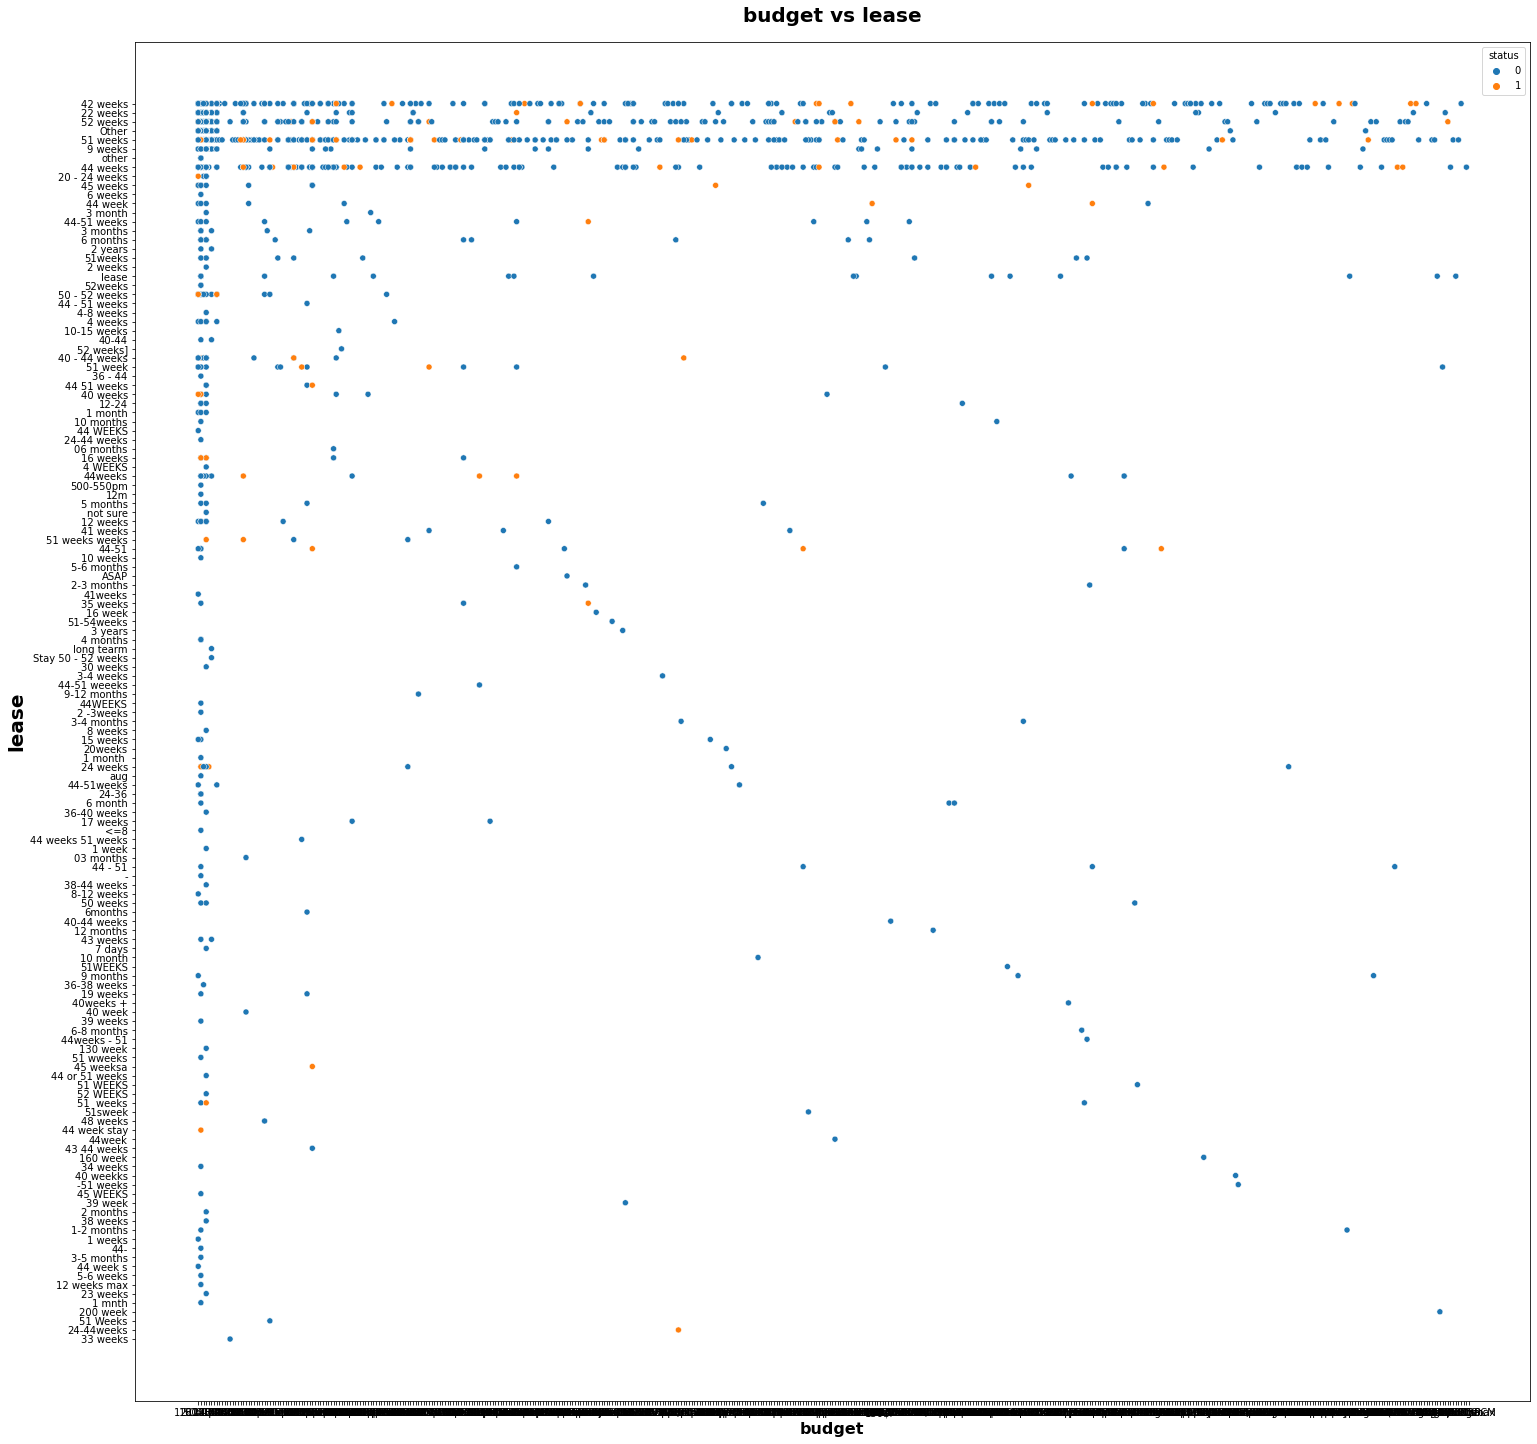

In [134]:
plt.subplots(figsize=(25,25))
sns.scatterplot(x="budget", y='lease', data=df,ec = "white",color='b', hue='status')
plt.title("budget vs lease", weight="bold",fontsize=20, pad=20)
plt.ylabel("lease", weight="bold", fontsize=20)
plt.xlabel("budget", weight="bold", fontsize=16)
plt.show()

In [119]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2020.1 in c:\users\mgc\anaconda3\lib\site-packages (from pandas<1.6.0,>=1.3.0->pycaret) (2021.3)

